In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
wage1 = pd.read_excel('wage1.xls')
wage1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

In [3]:
wage1.isna().sum()

wage        0
educ        0
exper       0
tenure      0
nonwhite    0
female      0
married     0
numdep      0
smsa        0
northcen    0
south       0
west        0
construc    0
ndurman     0
trcommpu    0
trade       0
services    0
profserv    0
profocc     0
clerocc     0
servocc     0
lwage       0
expersq     0
tenursq     0
dtype: int64

In [4]:
wage1['lwage'] = np.log(wage1['wage'])
wage_final = wage1[['wage','educ','exper','tenure','married','lwage']]

(array([  1.,   0.,   5.,  14., 151., 133., 109.,  71.,  27.,  15.]),
 array([-0.63487827, -0.24958289,  0.13571248,  0.52100786,  0.90630324,
         1.29159862,  1.67689399,  2.06218937,  2.44748475,  2.83278013,
         3.2180755 ]),
 <BarContainer object of 10 artists>)

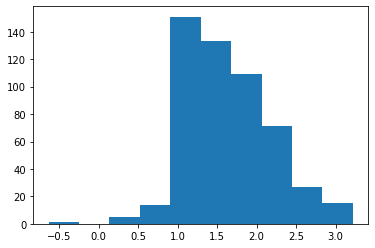

In [5]:
plt.hist(wage_final['lwage'])

In [6]:
wage_final.describe()

,wage,educ,exper,tenure,married,lwage
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.608365,1.623268
std,3.693086,2.769022,13.57216,7.224462,0.488580,0.531538
min,0.530000,0.000000,1.00000,0.000000,0.000000,-0.634878
25%,3.330000,12.000000,5.00000,0.000000,0.000000,1.202972
50%,4.650000,12.000000,13.50000,2.000000,1.000000,1.536867
75%,6.880000,14.000000,26.00000,7.000000,1.000000,1.928619
max,24.980000,18.000000,51.00000,44.000000,1.000000,3.218076


<AxesSubplot:>

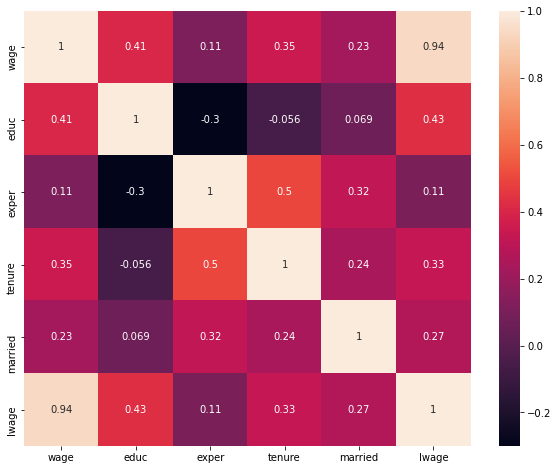

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(wage_final.corr(), annot=True)

In [8]:
x1 = wage_final[['educ','exper','tenure','married']]
y = wage_final['lwage']

In [9]:
# Convertimos a x1 (el conjunto de variables) en una constante llamada x
x = sm.add_constant(x1)
# Ajustamos el modelo
resultado=sm.OLS(y,x).fit()
# Obtenemos un resumen del modelo
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     65.99
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           3.76e-45
Time:                        03:53:59   Log-Likelihood:                -305.64
No. Observations:                 526   AIC:                             621.3
Df Residuals:                     521   BIC:                             642.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2843      0.103      2.767      0.006       0.082       0.486
educ           0.0870      0.007     11.859      0.000       0.073       0.101
exper          0.0022      0.002      1.230      0.219      -0.001       0.006
tenure         0.0211      0.003      6.889      0.000       0.015       0.027
married        0.1666      0.042      3.988      0.000       0.085       0.249
==============================================================================
Omnibus:                       11.084   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               19.547
Skew:                           0.042   Prob(JB):                     5.69e-05
Kurtosis:                       3.941   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

salario_hat = 0.2843 + 0.0870(educ) + 0.0022(exper) + 0.0211(tenure) + 0.1666(married)

Text(0, 0.5, 'Log(Salario)')

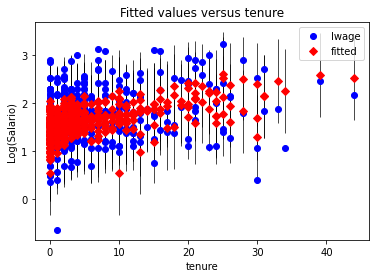

In [31]:
fig, ax = plt.subplots()
exog_idx = 3
fig = sm.graphics.plot_fit(resultado, exog_idx=exog_idx, ax=ax)
ax.set_ylabel("Log(Salario)")

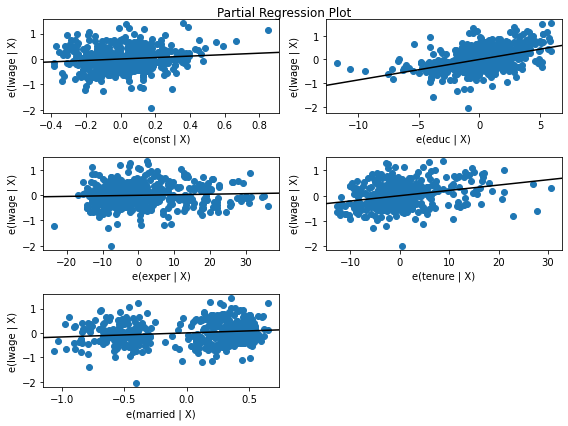

In [11]:
from statsmodels.graphics.regressionplots import plot_partregress_grid
fig = plt.figure(figsize=(8, 6))
plot_partregress_grid(resultado, fig=fig)
plt.show()

In [13]:
prediccion_wage = pd.DataFrame(y)
prediccion_wage['prediccion'] = resultado.predict()
prediccion_wage['diferencia'] = prediccion_wage['prediccion']-prediccion_wage['lwage']

In [14]:
prediccion_wage

,lwage,prediccion,diferencia
0,1.131402,1.245693,0.114291
1,1.175573,1.584930,0.409357
2,1.098612,1.245693,0.147081
3,1.791759,1.832903,0.041144
4,1.667707,1.552305,-0.115402
...,...,...,...
521,2.708050,1.915542,-0.792508
522,0.819780,1.158690,0.338910
523,1.541159,2.163677,0.622518
524,2.447551,1.874884,-0.572666


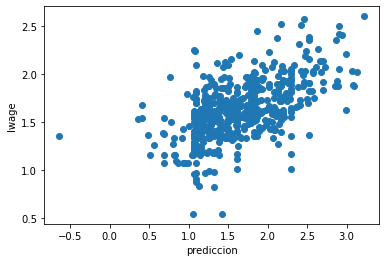

In [15]:
plt.scatter(prediccion_wage['lwage'], prediccion_wage['prediccion'])
plt.xlabel('prediccion')
plt.ylabel('lwage')
plt.show()

In [16]:
def confusion_matrix(data, actual_values, model):
    pred_values = model.predict(data)
    bins=np.array([-0.634878,1.62,3.21])
    cm=np.histogram2d(actual_values,pred_values,bins=bins)[0]
    accuracy=(cm[0,0]+cm[1,1])/cm.sum()
    print(f'Matriz: {cm}, Precision: {accuracy*100}%')

In [17]:
confusion_matrix(x, y, resultado)

Matriz: [[204.  89.]
 [ 62. 169.]], Precision: 71.18320610687023%


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
X = wage_final[['educ','exper','tenure','married']]
Y = wage_final['lwage']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=5)

In [20]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=2)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)

df_predicciones.head(10)

Entrenamiento: MSE =0.17713877265454184
Pruebas: MSE =0.1619057141057048


,valor_real,prediccion,diferencia
0,1.982380,1.463807,0.518573
1,1.541159,2.352298,-0.811139
2,2.014903,1.875857,0.139046
3,1.467874,1.770428,-0.302554
4,1.871802,1.873697,-0.001895
5,1.386294,1.470474,-0.084179
6,1.791759,1.700050,0.091709
7,1.519513,1.528007,-0.008494
8,1.832581,1.901338,-0.068757
9,2.447551,1.824813,0.622738


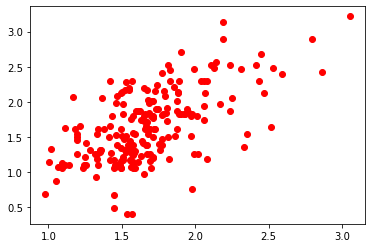

In [21]:
plt.scatter(df_predicciones['prediccion'], df_predicciones['valor_real'], c='red')

In [22]:
# The coefficients
print('Coefficients: \n', poly_model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_test_predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, y_test_predict))


Coefficients: 
 [ 0.00000000e+00 -8.48131247e-02  2.93727217e-02  5.64853479e-03
  1.96960285e-01  7.02216731e-03 -1.32185637e-04  2.43134238e-03
 -1.72473818e-02 -5.05276686e-04 -1.30734295e-04 -3.75462042e-03
 -3.79879674e-04 -2.04813724e-03  1.96960285e-01]
Mean squared error: 0.16
Coefficient of determination: 0.37
